Машинное обучение для людей. Разбираемся простыми словами: https://vas3k.ru/blog/machine_learning/

http://conf.sfu-kras.ru/sites/mn2012/thesis/s021/s021-083.pdf

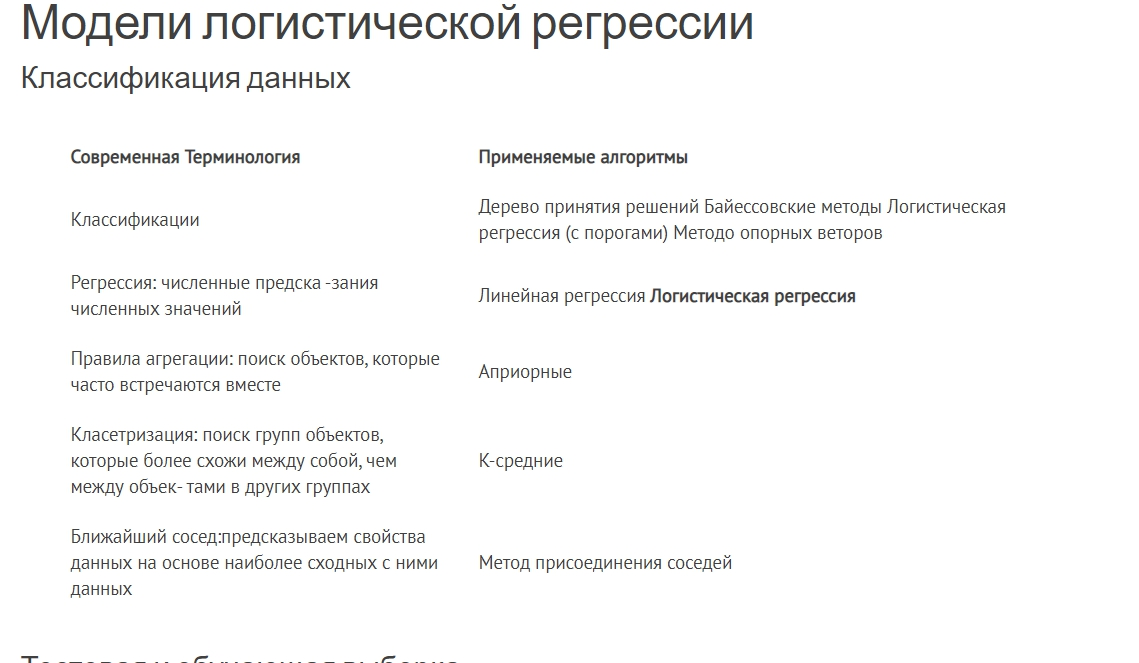

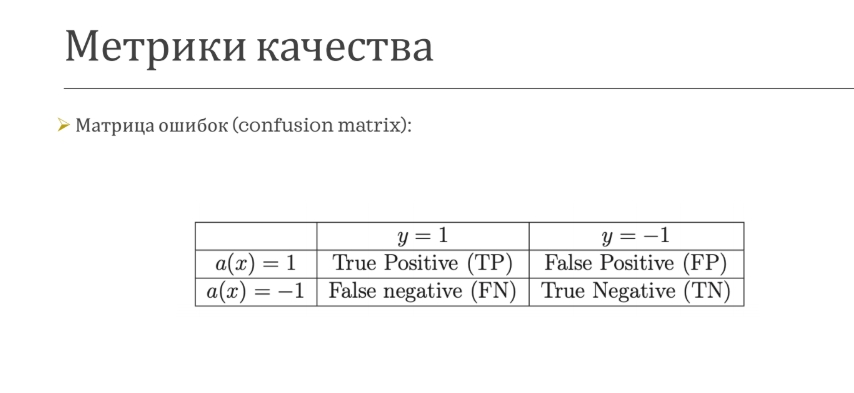

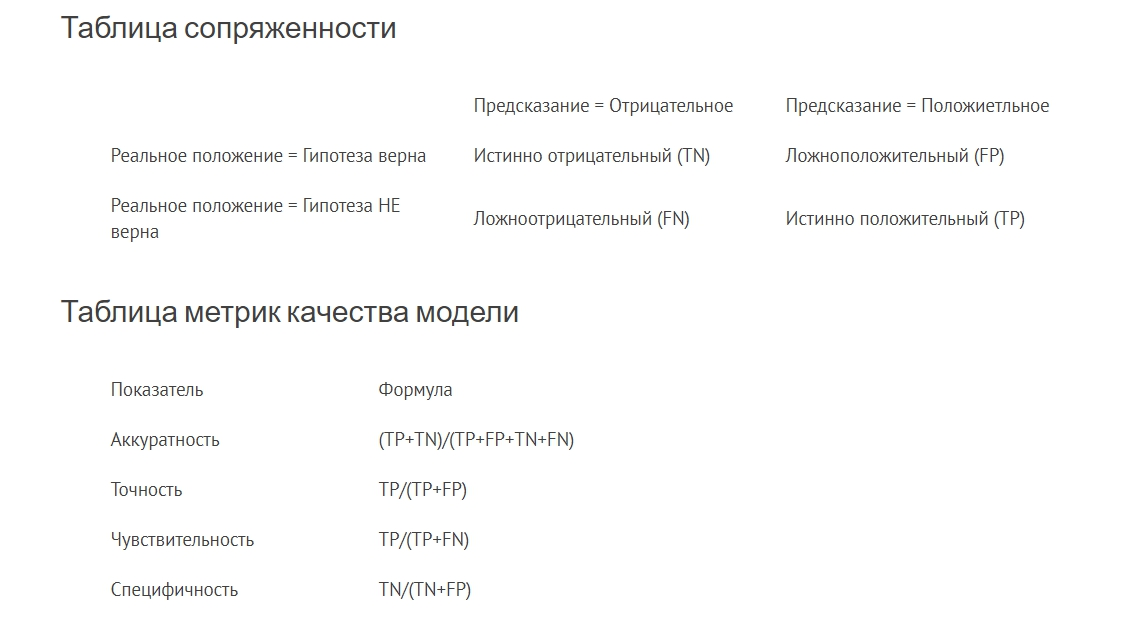

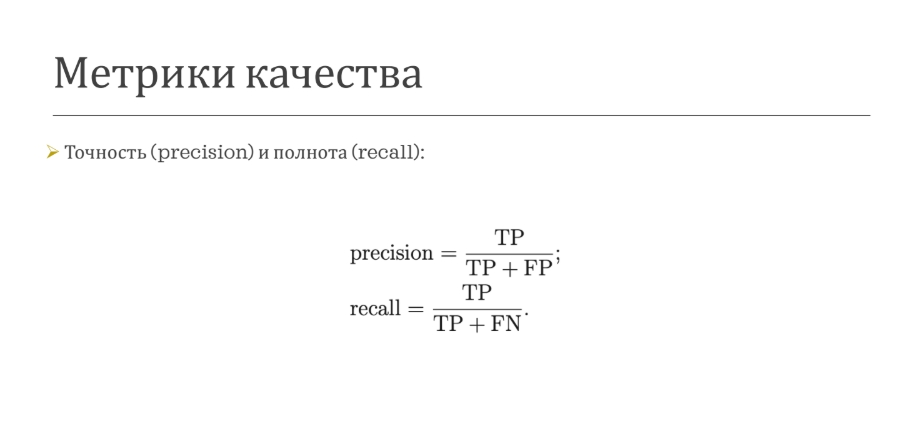

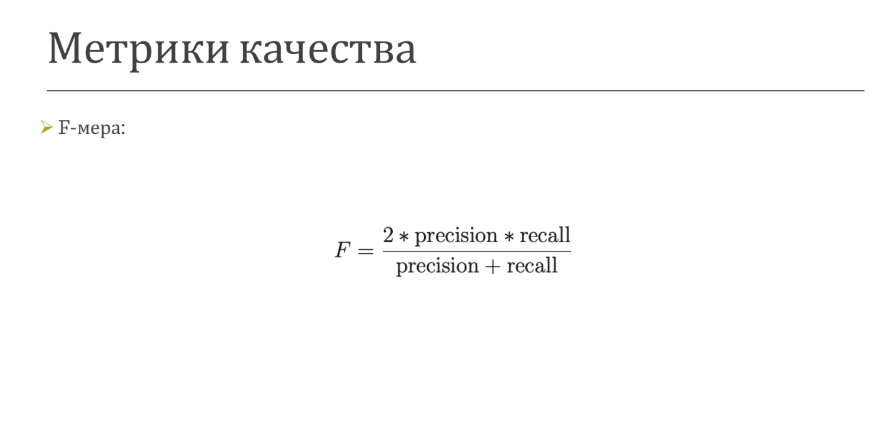

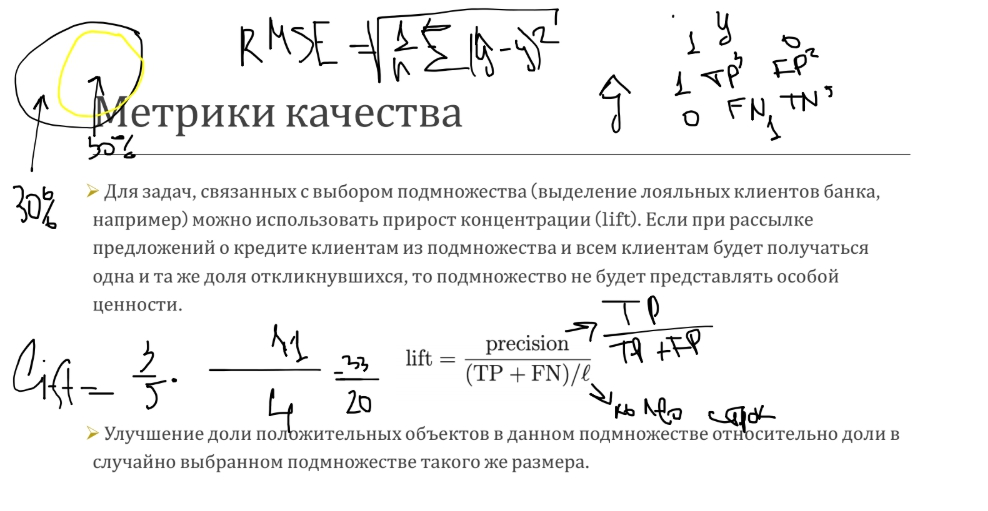

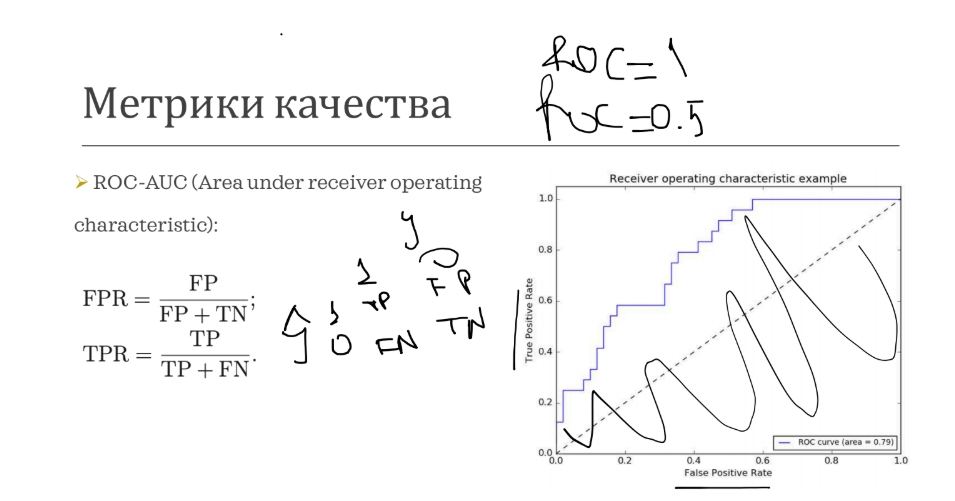

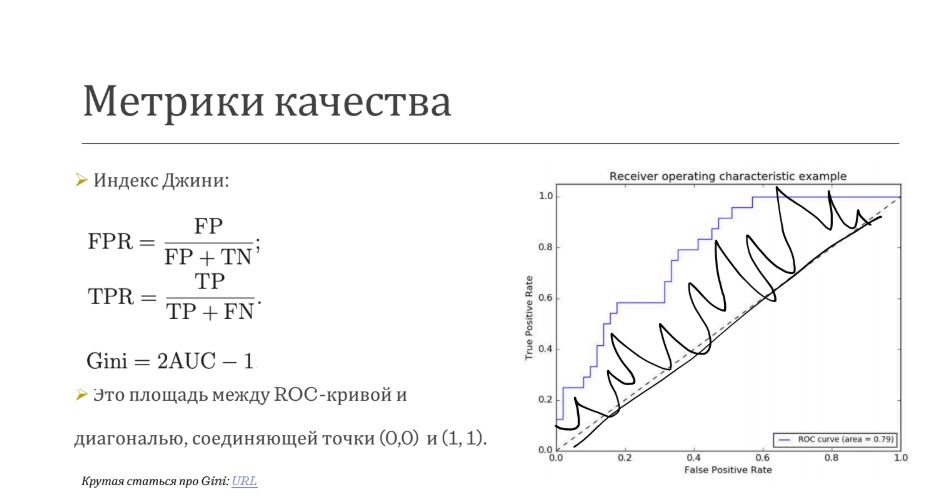

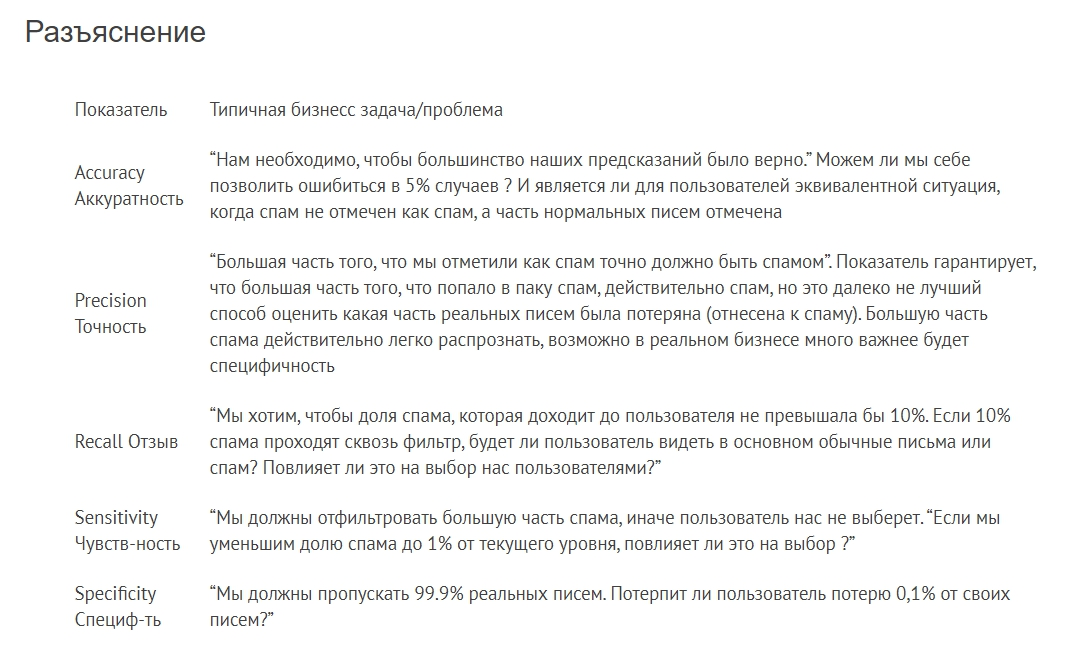

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
# Импортируем датасет и избавимся от нулевых строк
df = pd.read_csv('input/framingham.csv')
df.dropna(axis=0,inplace=True) #избавляемся от строчек с пропущенными значениями

Задача 1:

прогноз риска ишемичсекой болезни сердца в 10 летней перспективе в зависимости от всех имеющихся параметров

In [3]:
# разбиваем датафрейм на две части, dfx - параметры, dfy - целевая переменная. 
dfx = df.drop('TenYearCHD', axis = 1)
dfy = df[['TenYearCHD']] 

In [4]:
# разбиваем датасет на train и test выборку в соотношениии 80% train / 20% test случайным образом
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2) 

In [5]:
# используем логистическую регрессию из sklearn. Имя lm - для краткости записи
lm = linear_model.LogisticRegression(solver='liblinear') 
# solver='liblinear' задает алгоритм поиска максимума функции правдоподобия. 

In [6]:
# функция fit обучает регрессию - подбирает коэффициенты
model = lm.fit(X_train, y_train.values.ravel()) 

In [7]:
# выведем коэффициенты модели
model.coef_

array([[ 0.44388587,  0.04778499, -0.10597462, -0.11979833,  0.02167277,
         0.489541  ,  0.36029187,  0.44387325,  0.45184724,  0.00074757,
         0.01373122, -0.00985862, -0.01163971, -0.01200986,  0.00377219]])

In [8]:
# выведем коэффициент при константе
model.intercept_

array([-4.88210316])

In [9]:
# возьмем одного пациента из тестовой выборки и сделаем для него прогноз
X_test[:1]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2486,1,57,1.0,1,20.0,0.0,0,1,0,235.0,150.0,95.5,27.56,78.0,73.0


In [10]:
# прогноз вероятности отнесения к каждому классу (0 - нет риска, 1 - есть риск)
# первый элемент массива - вероятность класса 0, второй - вероятность класса 1
lm.predict_proba(X_test[:1])

array([[0.67944946, 0.32055054]])

In [11]:
# классификация (0 - нет риска, 1 - есть риск)
lm.predict(X_test[:1])

array([0], dtype=int64)

In [12]:
# сделаем prediction классов на всей тестовой выборке
y_pred = lm.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
y_pred.sum()

13

In [14]:
 # смотрим accuracy модели
lm.score(X_test, y_test)

0.8333333333333334

In [15]:
# смотрим confusion matrix - таблицу правильных и неправильных предсказаний
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 

array([[599,   2],
       [120,  11]], dtype=int64)

In [16]:
y_test['TenYearCHD'].value_counts()

0    601
1    131
Name: TenYearCHD, dtype: int64

In [17]:
y_pred.sum()

13

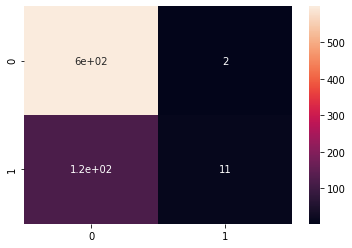

In [18]:
# строим тепловую карту
# Обратите внимание - по строкам расположены настоящие значения классов, а по столбцам - предсказанные
sn.heatmap(cnf_matrix, annot=True)

Выводы:
Наша модель хорошо работает на "здоровых" пациентах и плохо на "больных":
Из 100 (примерно) пациентов группы риска модель нашла около 10 (примерно), это значит, что вероятность ошибки второго рода высока. Для медицинского теста это плохо, поэтому нам нужно более аккуратно выбирать параметры.

Задача 2

прогноз риска ишемической болезни сердца в 10 летней перспективе в зависимости только от пола

Делаем те же самые шаги, но с новыми переменными

In [19]:
list_col=['male']
dfx1 = df[list_col]
dfy1 = df[['TenYearCHD']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(dfx1, dfy1, test_size=0.2)
lm1 = linear_model.LogisticRegression(solver='liblinear') 
model1 = lm1.fit(X_train1, y_train1.values.ravel())

In [20]:
# Выведем коэффициенты модели. 
model1.coef_

array([[0.44031326]])

In [21]:
# выведем коэффициент при константе
model1.intercept_

array([-1.91327495])

In [22]:
# Сделаем предсказания класса для всей тестовой выборки и вычислим accuracy модели

y_pred1 = lm1.predict(X_test1) 
lm1.score(X_test1, y_test1)

0.8538251366120219

In [23]:
# Посмотрим на ошибки предсказания более детально:
cnf_matrix2 = metrics.confusion_matrix(y_test1, y_pred1)
cnf_matrix2

array([[625,   0],
       [107,   0]], dtype=int64)

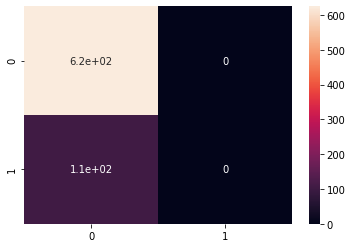

In [24]:
sn.heatmap(cnf_matrix2, annot=True)

Выводы:
Acuuracy модели довольно высока, но если присмотреться, нас ждет сюрприз:
Внезапно модель считает всех пациентов здоровыми. Таким образом, пол сам по себе - бесполезный фактор для классификации.

In [40]:
# Импортируем обучающую выборку для выполнения задания
df_train = pd.read_csv('input/Fram_train.csv')

# Импортируем тестовую выборку для выполнения задания
df_test = pd.read_csv('input/Fram_test.csv')

In [41]:
df_test = df_test.drop('Unnamed: 0', axis = 1)
df_test.dropna(axis=0,inplace=True) #избавляемся от строчек с пропущенными значениями

In [42]:
df_train = df_train.drop('Unnamed: 0', axis = 1)
df_train.dropna(axis=0,inplace=True) #избавляемся от строчек с пропущенными значениями

In [43]:
df_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,50,1.0,0,0.0,0.0,0,0,1,258.0,127.0,80.0,24.10,75.0,124.0,0
1,1,48,2.0,1,20.0,0.0,0,1,0,230.0,140.5,89.0,23.34,66.0,80.0,1
4,0,57,1.0,1,43.0,0.0,0,1,0,283.0,207.5,118.0,38.61,100.0,83.0,1
5,1,51,3.0,0,0.0,0.0,0,0,0,218.0,115.0,75.0,25.62,82.0,62.0,0
6,0,40,3.0,1,30.0,0.0,0,0,0,280.0,115.0,81.0,21.32,62.0,84.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,41,3.0,1,15.0,0.0,0,1,0,268.0,140.0,92.5,24.71,75.0,90.0,0
727,0,38,1.0,1,30.0,0.0,0,0,0,164.0,113.0,68.0,25.75,70.0,75.0,0
728,1,53,1.0,1,40.0,0.0,0,1,0,270.0,151.0,89.0,26.76,75.0,75.0,0
730,0,46,2.0,1,15.0,0.0,0,1,0,207.0,144.0,88.0,23.65,85.0,86.0,0


In [44]:
df_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,1,56,4.0,1,20.0,0.0,0,1,0,228.0,151.5,103.0,23.58,65.0,66.0,0
2921,1,55,1.0,1,45.0,0.0,0,0,0,345.0,134.0,89.0,27.38,72.0,60.0,0
2922,1,46,1.0,1,20.0,0.0,0,0,0,273.0,132.5,69.0,26.83,120.0,88.0,0
2923,1,43,1.0,1,30.0,0.0,0,0,0,252.0,112.0,78.0,24.25,90.0,65.0,1


In [45]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [74]:
# разбиваем датафрейм на две части, X - параметры, y - целевая переменная. 
X_train = df_train.drop('TenYearCHD', axis = 1)
y_train = df_train[['TenYearCHD']]

X_test = df_test.drop('TenYearCHD', axis = 1)
y_test = df_test[['TenYearCHD']]

In [75]:
# проверяем
df_test.shape, df_train.shape, X.shape, X_train.shape, X_test.shape

((630, 16), (2516, 16), (2516, 15), (2516, 15), (630, 15))

In [76]:
# используем логистическую регрессию из sklearn. Имя lm - для краткости записи
lm = linear_model.LogisticRegression(solver='liblinear', random_state=RANDOM_SEED) 
# solver='liblinear' задает алгоритм поиска максимума функции правдоподобия. 

In [93]:
# функция fit обучает регрессию - подбирает коэффициенты<br/>
model = lm.fit(X_train, y_train.values.ravel()) 

In [98]:
model.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)>

In [100]:
# выведем коэффициенты модели
model.coef_

array([[ 0.40478928,  0.04435478, -0.11697099, -0.05755504,  0.02127708,
         0.03599211,  0.53752875,  0.42945673,  0.35565654,  0.00089719,
         0.01355159, -0.01060345, -0.00127159, -0.0131899 ,  0.00687147]])

In [87]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [79]:
# выведем коэффициент при константе
model.intercept_

array([-5.00904937])

In [80]:
# возьмем одного пациента из тестовой выборки и сделаем для него прогноз
X_test[:1]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,50,1.0,0,0.0,0.0,0,0,1,258.0,127.0,80.0,24.1,75.0,124.0


In [81]:
# прогноз вероятности отнесения к каждому классу (0 - нет риска, 1 - есть риск)
# первый элемент массива - вероятность класса 0, второй - вероятность класса 1
lm.predict_proba(X_test[:1])

array([[0.83427038, 0.16572962]])

In [82]:
# сделаем prediction классов на всей тестовой выборке
y_pred = lm.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [90]:
y_pred.sum()

1

In [84]:
 # смотрим accuracy модели
lm.score(X_test, y_test)

0.8571428571428571

In [85]:
# смотрим confusion matrix - таблицу правильных и неправильных предсказаний
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 

array([[539,   0],
       [ 90,   1]], dtype=int64)

In [65]:
y_test['TenYearCHD'].value_counts()

0    413
1     91
Name: TenYearCHD, dtype: int64

In [66]:
y_pred.sum()

7

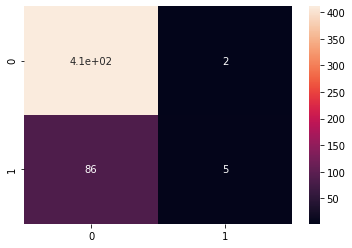

In [67]:
# строим тепловую карту
# Обратите внимание - по строкам расположены настоящие значения классов, а по столбцам - предсказанные
sn.heatmap(cnf_matrix, annot=True)